Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   block_time          9 non-null      float64
 1   pending_extrinsics  9 non-null      uint32 
 2   block_weight        9 non-null      uint64 
dtypes: float64(1), uint32(1), uint64(1)
memory usage: 308.0 bytes
None
       block_time  pending_extrinsics  block_weight
count    9.000000            9.000000      9.000000
mean    13.092747           25.666667     39.000000
std      4.381104           10.677078      9.513149
min      8.884632           13.000000     26.000000
25%      9.990764           19.000000     31.000000
50%     11.923326           24.000000     39.000000
75%     14.657243           30.000000     46.000000
max     22.299985           45.000000     52.000000

Correlation Matrix:
                    block_ti

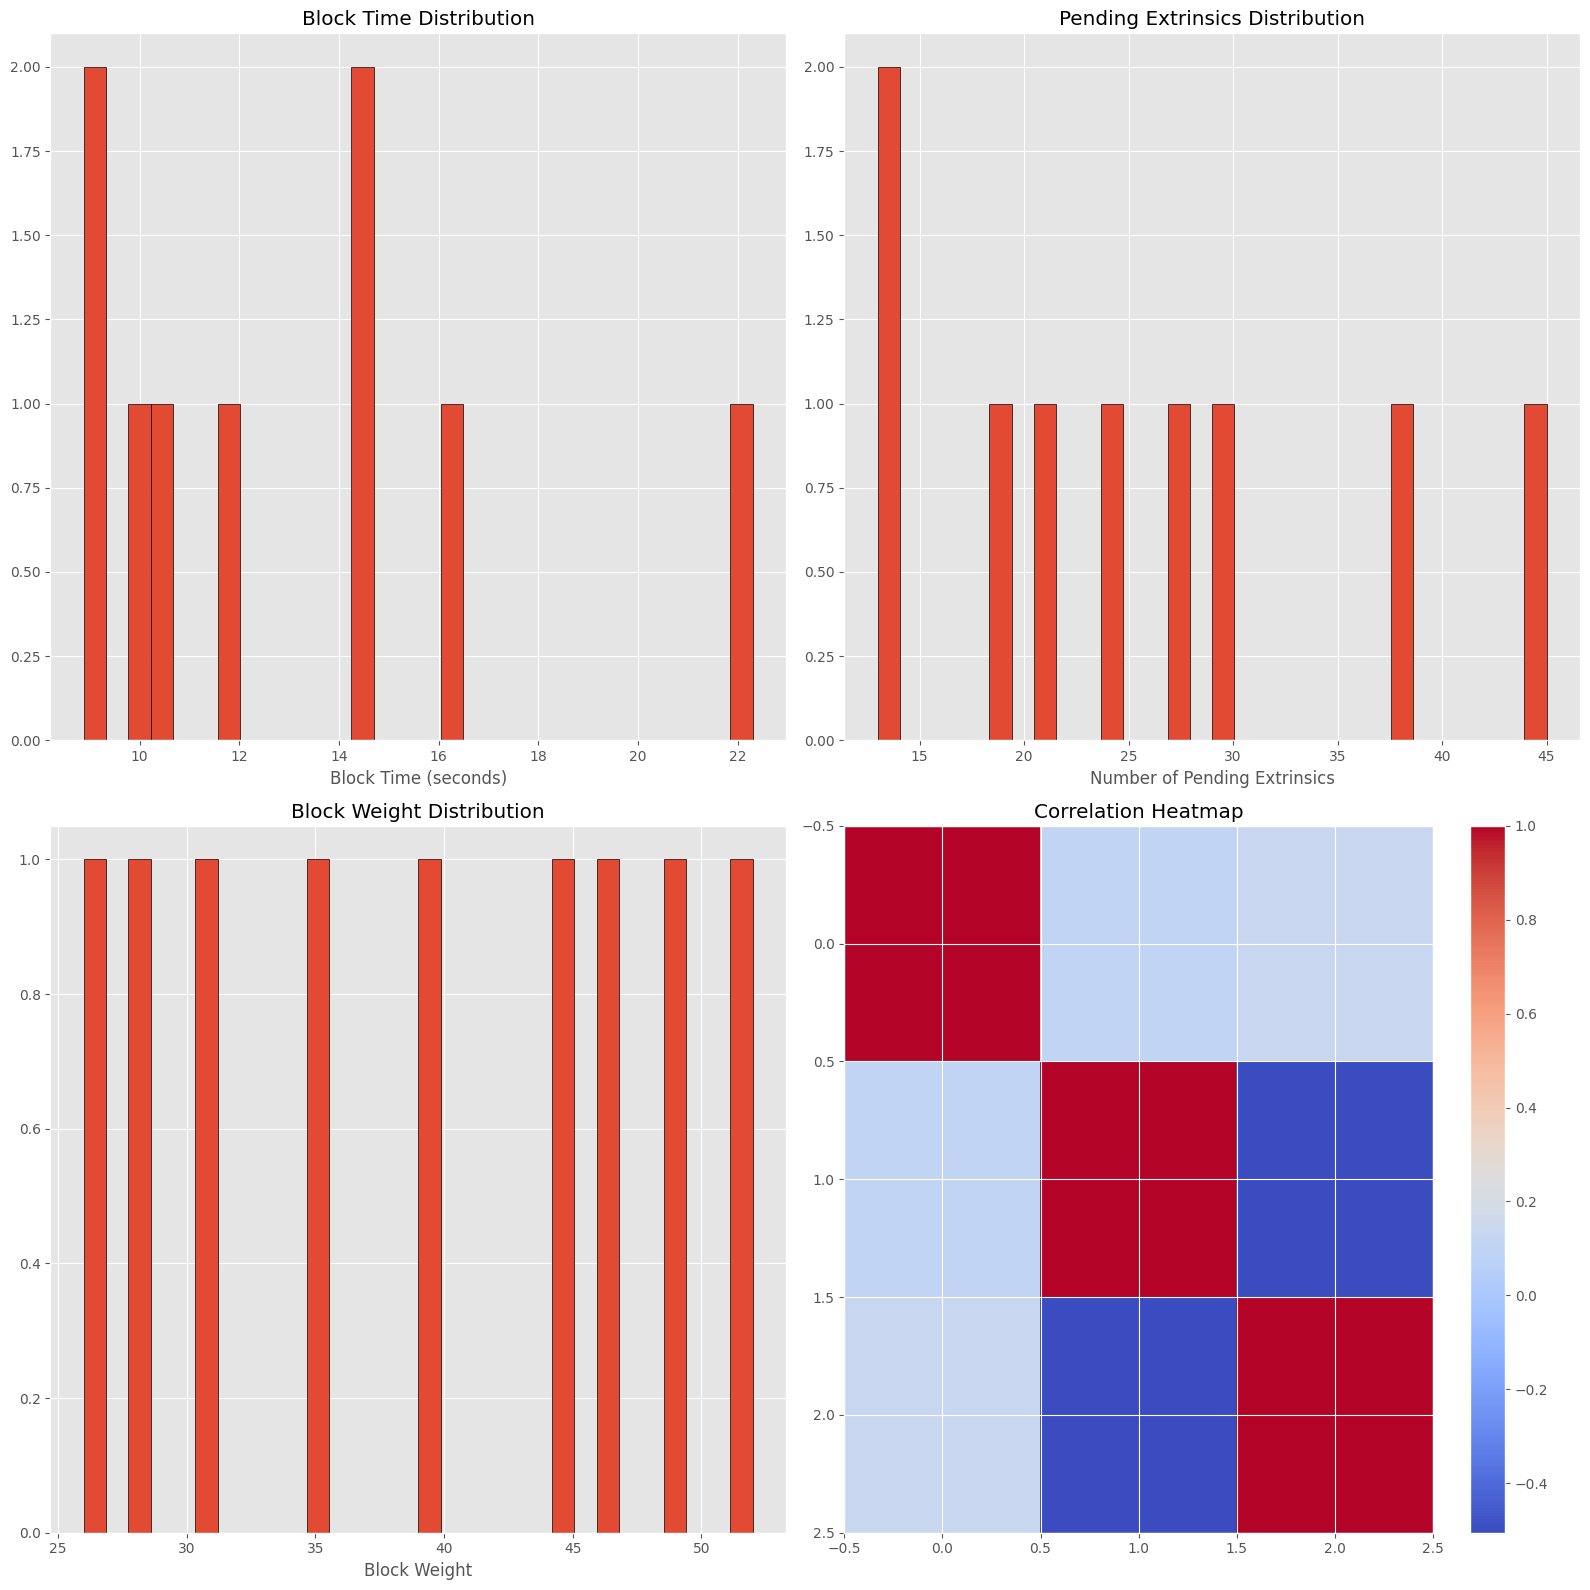


Columns in the DataFrame:
Index(['block_time', 'pending_extrinsics', 'block_weight', 'block_number'], dtype='object')


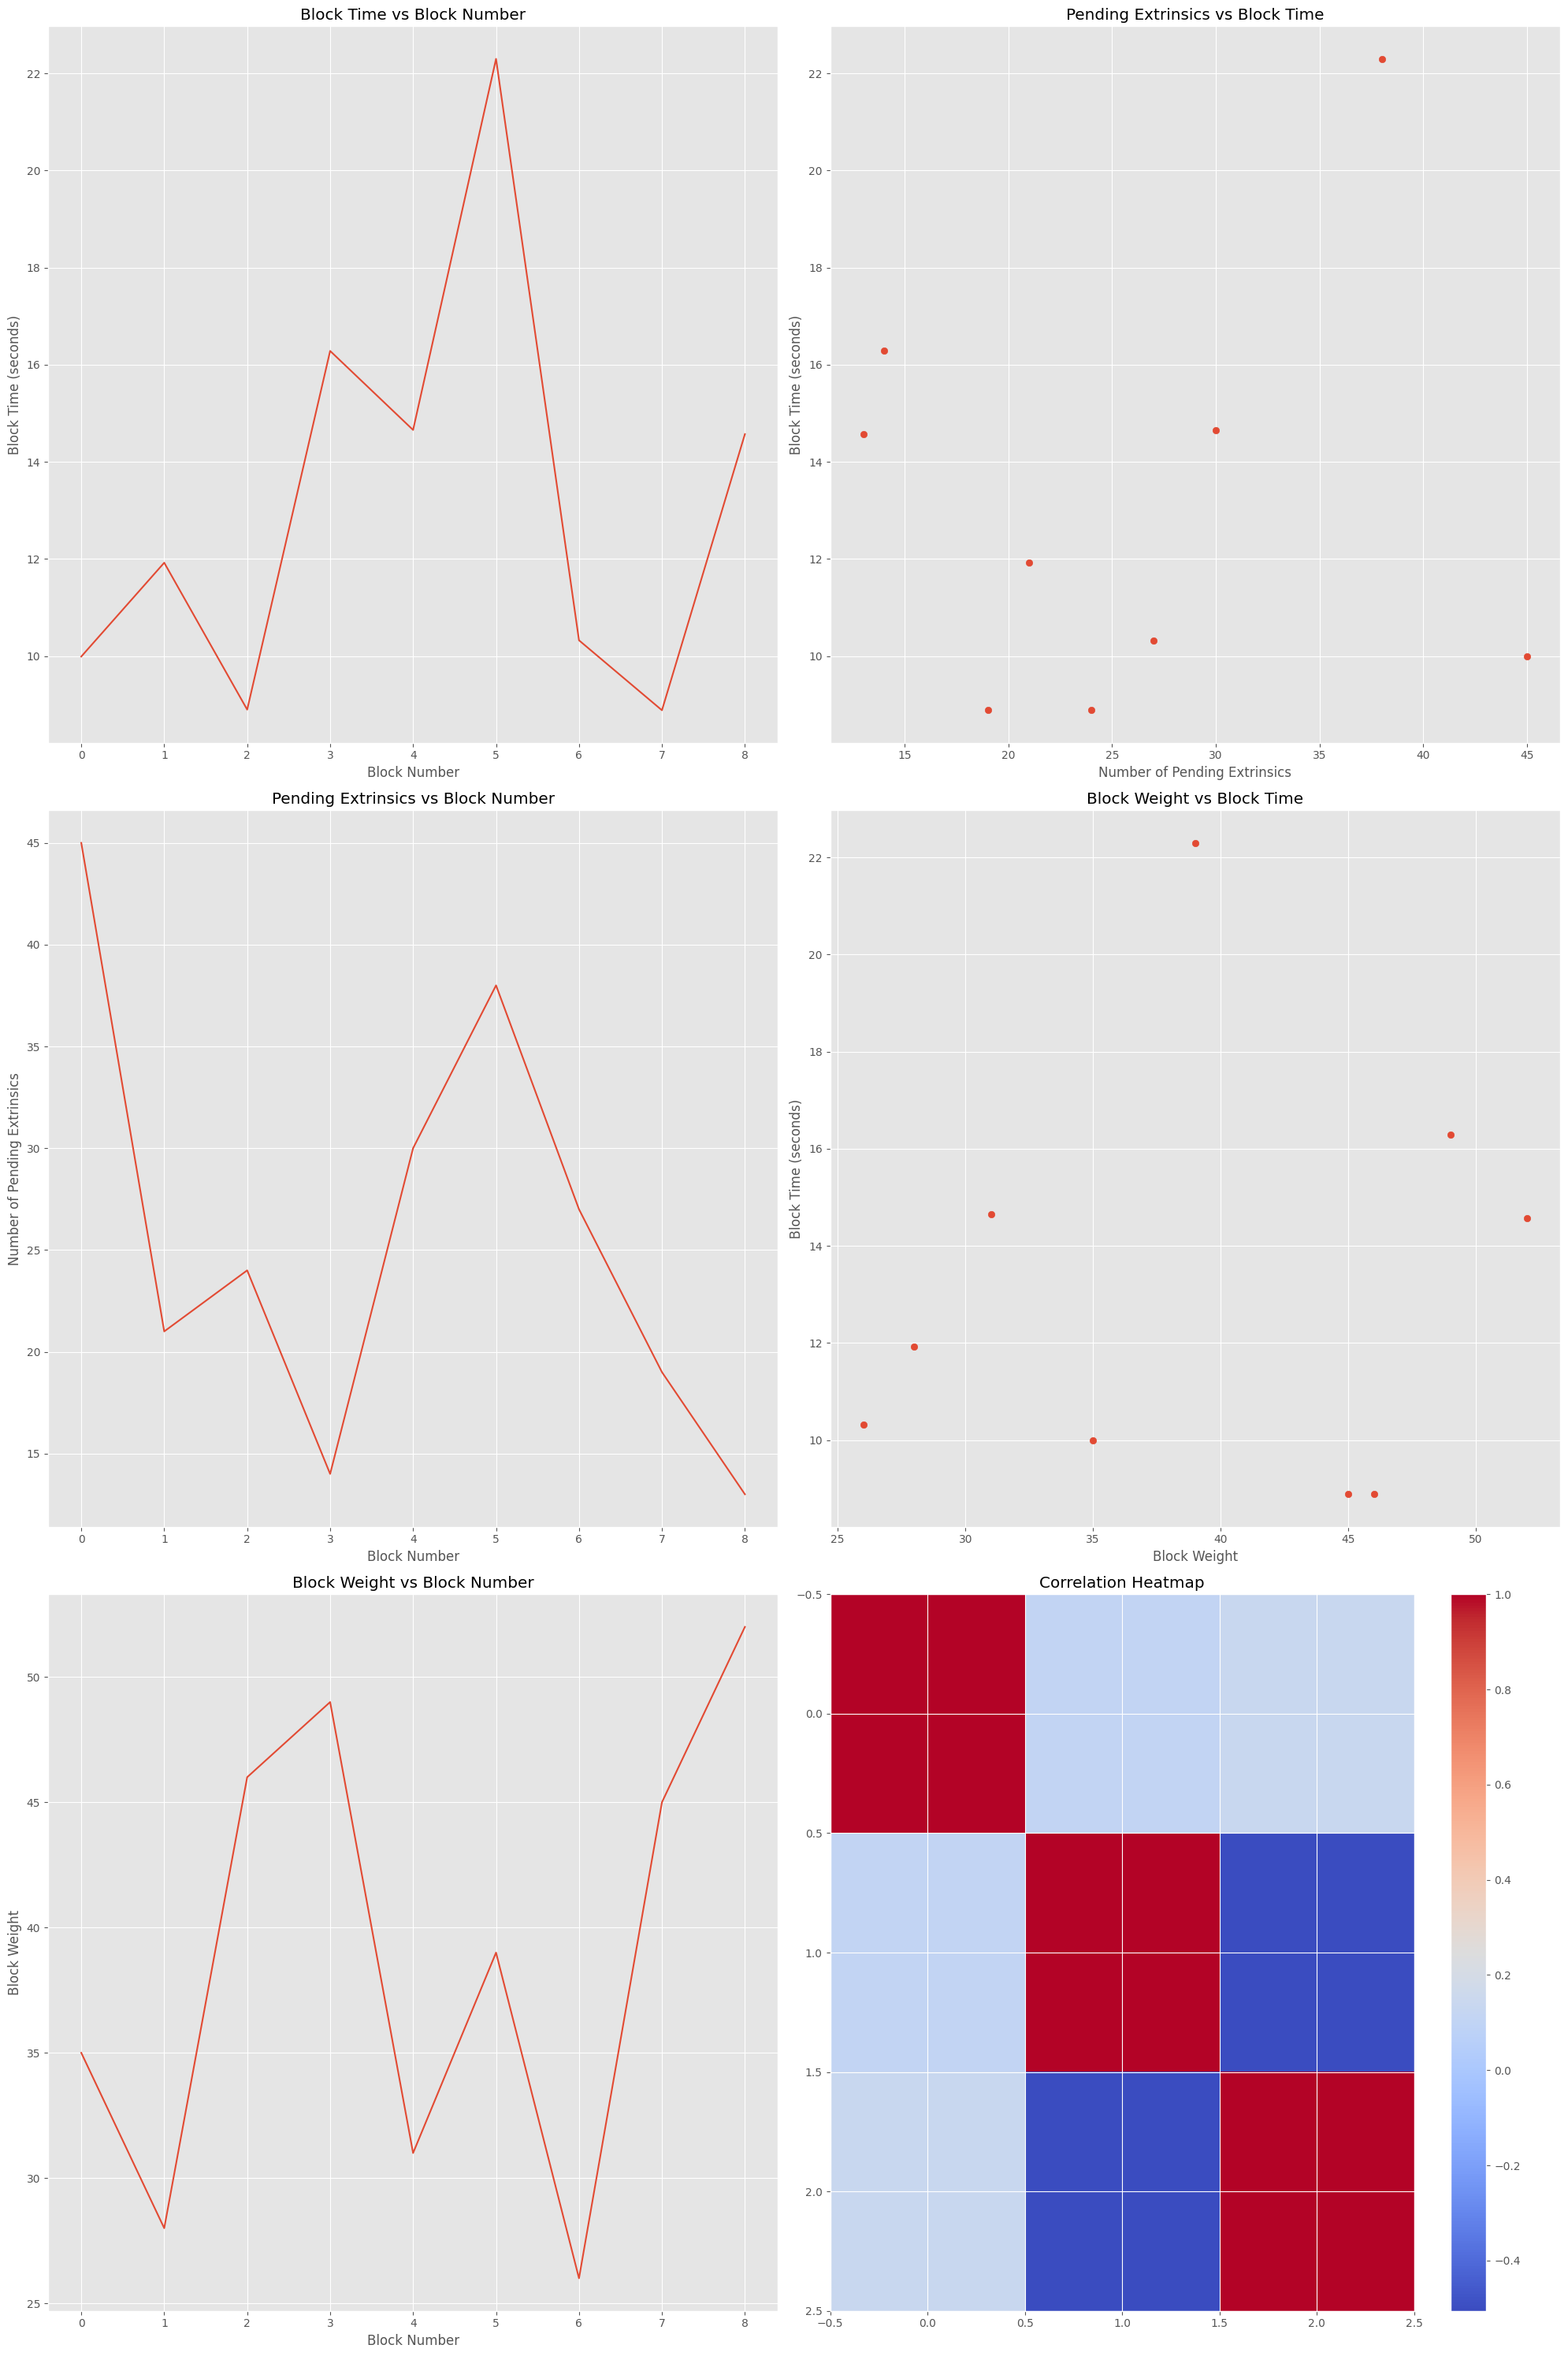

In [10]:
%pip install pyarrow pandas matplotlib seaborn

import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Parquet file
parquet_file = './block_data.parquet'
table = pq.read_table(parquet_file)
df = table.to_pandas()

# Display basic information about the DataFrame
print(df.info())

# Display summary statistics
print(df.describe())

# Calculate correlations between columns
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Set up the plotting style
plt.style.use('ggplot')  # Using 'ggplot' style instead of 'seaborn'

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Plot block time distribution
axes[0, 0].hist(df['block_time'], bins=30, edgecolor='black')
axes[0, 0].set_title('Block Time Distribution')
axes[0, 0].set_xlabel('Block Time (seconds)')

# Plot pending extrinsics distribution
axes[0, 1].hist(df['pending_extrinsics'], bins=30, edgecolor='black')
axes[0, 1].set_title('Pending Extrinsics Distribution')
axes[0, 1].set_xlabel('Number of Pending Extrinsics')

# Plot block weight distribution
axes[1, 0].hist(df['block_weight'], bins=30, edgecolor='black')
axes[1, 0].set_title('Block Weight Distribution')
axes[1, 0].set_xlabel('Block Weight')

# Plot correlation heatmap
im = axes[1, 1].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[1, 1].set_title('Correlation Heatmap')
plt.colorbar(im, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Time series analysis
# Create a figure with subplots for time series and scatter plots
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

# Check if 'block_number' exists in the DataFrame
if 'block_number' not in df.columns:
    df['block_number'] = range(len(df))

# Display the columns of the DataFrame
print("\nColumns in the DataFrame:")
print(df.columns)

# Plot block time over block number
axes[0, 0].plot(df['block_number'], df['block_time'])
axes[0, 0].set_title('Block Time vs Block Number')
axes[0, 0].set_xlabel('Block Number')
axes[0, 0].set_ylabel('Block Time (seconds)')

# Scatter plot of pending extrinsics vs block time
axes[0, 1].scatter(df['pending_extrinsics'], df['block_time'])
axes[0, 1].set_title('Pending Extrinsics vs Block Time')
axes[0, 1].set_xlabel('Number of Pending Extrinsics')
axes[0, 1].set_ylabel('Block Time (seconds)')

# Plot pending extrinsics over block number
axes[1, 0].plot(df['block_number'], df['pending_extrinsics'])
axes[1, 0].set_title('Pending Extrinsics vs Block Number')
axes[1, 0].set_xlabel('Block Number')
axes[1, 0].set_ylabel('Number of Pending Extrinsics')

# Scatter plot of block weight vs block time
axes[1, 1].scatter(df['block_weight'], df['block_time'])
axes[1, 1].set_title('Block Weight vs Block Time')
axes[1, 1].set_xlabel('Block Weight')
axes[1, 1].set_ylabel('Block Time (seconds)')

# Plot block weight over block number
axes[2, 0].plot(df['block_number'], df['block_weight'])
axes[2, 0].set_title('Block Weight vs Block Number')
axes[2, 0].set_xlabel('Block Number')
axes[2, 0].set_ylabel('Block Weight')

# Keep the correlation heatmap
im = axes[2, 1].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[2, 1].set_title('Correlation Heatmap')
plt.colorbar(im, ax=axes[2, 1])

plt.tight_layout()
plt.show()